In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
%matplotlib inline

from scipy import stats
import sklearn
#import statsmodels.api as sm
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.stats import diagnostic as diag
#from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score,classification_report

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

#import math
#https://www.kaggle.com/shishir349/can-pizza-be-healthy

ModuleNotFoundError: No module named 'seaborn'

In [1]:
df =pd.read_csv("Pizza.csv")
df.head(5)

NameError: name 'pd' is not defined

In [ ]:
df.shape


(300, 9)

In [ ]:
df.keys()

Index(['brand', 'id', 'mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal'], dtype='object')

We encode the brands(which are categorical) to numerical values from 0 to 1

In [ ]:
le1 =LabelEncoder()
df['brand'] = le1.fit_transform(df['brand'])
labels = df['brand']
classes = df['brand'].unique()
print(classes)

[0 1 2 3 4 5 6 7 8 9]


Remove the id column since it doesn't add any information to the analysis and used just for reference

In [ ]:
pizza_no_id = df.drop(columns='id').copy() 
pizza_no_id.head(2)

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84


We plot all the components and see how the different brands in the Pizza dataset are grouped. In a Scatter Plot Matrix, each subplot displays a feature against another, so if we have n features we have a nxn matrix.

In [ ]:
import plotly.express as px

features = ["mois", "prot", "fat", "ash", "sodium","carb","cal"]

fig = px.scatter_matrix(pizza_no_id,dimensions=features,color="brand")
fig.update_traces(diagonal_visible=False)
fig.show()

Now to calculate pca we can eliminate the brand column for now

In [ ]:
pizza_no_brand = pizza_no_id.drop(columns='brand').copy()
pizza_no_brand.head(3)

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95


Since all the components/ features vary greatly in their range of values, we need to scale them to smaller similar values between 0- 1 to get a more accurate result

In [ ]:
scaler=StandardScaler()
scaler.fit(pizza_no_brand)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data=scaler.transform(pizza_no_brand)

In [ ]:
scaled_data

array([[-1.37181459,  1.25418127,  2.74984143, ...,  2.97668662,
        -1.22751105,  2.68012924],
       [-1.30156227,  1.22771661,  2.64047481, ...,  3.03077869,
        -1.21362189,  2.53473344],
       [-1.31624186,  1.03000998,  2.85139615, ...,  2.59804213,
        -1.22584435,  2.71243942],
       ...,
       [ 0.3823963 , -0.36794707, -0.46866201, ..., -0.07951534,
         0.1730719 , -0.56704362],
       [ 0.70220164, -0.45823828, -0.56352082, ..., -0.29588362,
         0.08918137, -0.82552504],
       [ 0.62251244, -0.53918903, -0.52780927, ..., -0.26883759,
         0.14529358, -0.7447496 ]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
sklearn_pca = PCA(n_components = None) 
sklearn_transf = sklearn_pca.fit_transform(scaled_data)
variance_expl = sklearn_pca.explained_variance_ratio_
print(variance_expl)

a=0
for i in variance_expl:
  a = a + i;

z = ((variance_expl[0] + variance_expl[1])/ a) *100
print()
z = round(z,2)
print("The first 2 components consist of ", z, "% of the total sample variance")

[5.95968842e-01 3.27208198e-01 5.92231918e-02 1.35963182e-02
 3.95385973e-03 4.82299078e-05 1.35982576e-06]

The first 2 components consist of  92.32 % of the total sample variance


From the graph plotted we see that the first 2 variables account for about 92% of the total variance

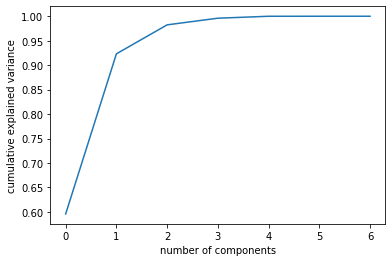

In [ ]:
pca = PCA().fit(scaled_data.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca = PCA(n_components = 2) 
transf = pca.fit_transform(scaled_data)
varianza_expl = pca.explained_variance_ratio_
print(varianza_expl)

[0.59596884 0.3272082 ]


In [ ]:
pca=PCA(n_components=2)

In [ ]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca=pca.transform(scaled_data)

In [ ]:
print("Dimensions before applying PCA: ", scaled_data.shape)
print("Dimensions after applying PCA: ",x_pca.shape)

Dimensions before applying PCA:  (300, 7)
Dimensions after applying PCA:  (300, 2)


In [ ]:
scaled_data

array([[-1.37181459,  1.25418127,  2.74984143, ...,  2.97668662,
        -1.22751105,  2.68012924],
       [-1.30156227,  1.22771661,  2.64047481, ...,  3.03077869,
        -1.21362189,  2.53473344],
       [-1.31624186,  1.03000998,  2.85139615, ...,  2.59804213,
        -1.22584435,  2.71243942],
       ...,
       [ 0.3823963 , -0.36794707, -0.46866201, ..., -0.07951534,
         0.1730719 , -0.56704362],
       [ 0.70220164, -0.45823828, -0.56352082, ..., -0.29588362,
         0.08918137, -0.82552504],
       [ 0.62251244, -0.53918903, -0.52780927, ..., -0.26883759,
         0.14529358, -0.7447496 ]])

In [ ]:
x_pca

array([[ 5.01034284,  2.67921532],
       [ 5.02375538,  2.52929455],
       [ 4.8054393 ,  2.67370033],
       [ 4.4695434 ,  2.28502923],
       [ 4.47189256,  2.1591524 ],
       [ 4.50479978,  2.16797296],
       [ 4.31535781,  2.05704328],
       [ 4.75785167,  2.35308587],
       [ 4.85461934,  2.68121904],
       [ 4.91640631,  2.65851314],
       [ 4.84099582,  2.73660839],
       [ 4.89136871,  2.74250173],
       [ 4.61075407,  2.57925365],
       [ 4.42153254,  2.29169853],
       [ 4.46677678,  2.13288492],
       [ 4.75343467,  2.46713643],
       [ 4.44513083,  1.82836512],
       [ 4.20201792,  1.80148331],
       [ 4.49687192,  1.88605015],
       [ 4.60756167,  2.2350726 ],
       [ 4.85726834,  2.96634356],
       [ 4.82265249,  2.78671232],
       [ 4.51834142,  2.16243103],
       [ 4.25395639,  2.12444278],
       [ 4.48975064,  2.0179968 ],
       [ 4.5415983 ,  2.38008587],
       [ 4.63411775,  2.60980367],
       [ 4.46880183,  2.43393573],
       [ 4.75034835,

Graph plotted after applying PCA

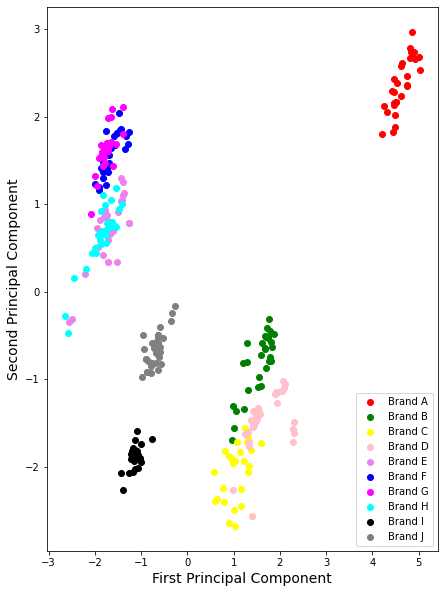

In [ ]:
Xax=x_pca[:,0]
Yax=x_pca[:,1]

labels= df.brand
cdict={0:'red',1:'green',2:'yellow',3:'pink',4:'violet',5:"blue", 6:'magenta', 7:'cyan', 8:'black', 9:'gray'}
labl={0:'Brand A',1:'Brand B', 2:'Brand C',3:'Brand D',4:"Brand E", 5:'Brand F', 6:'Brand G', 7:'Brand H', 8:'Brand I', 9:'Brand J'}
#marker={0:'*',1:'o'}
#alpha={0:.3, 1:.5}

fig,ax=plt.subplots(figsize=(7,10))
fig.patch.set_facecolor('white')

for l in np.unique(labels):
        ix=np.where(labels==l)
        #print(l)
        #print(ix)
        ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l])#,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

We apply the same scatter matrix to the data after applying PCA. it is seen that the first 2 eigenvalues do a good job at segregating the components (although there is a lot of overlap between various brands)

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

features = ["mois", "prot", "fat", "ash", "sodium","carb","cal"]
#brand', 'id', 'mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal'
pca = PCA()
components = pca.fit_transform(pizza_no_brand[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["brand"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

X = pizza_no_brand[["mois", "prot", "fat", "ash", "sodium","carb","cal"]]
pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['brand'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

To simplify further, we apply the same process on anly 2 brands

In [ ]:
df1 = pizza_no_id.copy()
indexNames1 = df[ df['brand'] == 4 ].index
indexNames2 = df[ df['brand'] == 7 ].index
indexNames3 = df[ df['brand'] == 0 ].index
indexNames4 = df[ df['brand'] == 1 ].index
indexNames5 = df[ df['brand'] == 8 ].index
indexNames6 = df[ df['brand'] == 5 ].index
indexNames7 = df[ df['brand'] == 6 ].index
indexNames8 = df[ df['brand'] == 9 ].index
df1.drop(indexNames1 , inplace=True)
df1.drop(indexNames2 , inplace=True)
df1.drop(indexNames3 , inplace=True)
df1.drop(indexNames4 , inplace=True)
df1.drop(indexNames5 , inplace=True)
df1.drop(indexNames6 , inplace=True)
df1.drop(indexNames7 , inplace=True)
df1.drop(indexNames8 , inplace=True)
print(df1)

In [ ]:
df1.shape

(59, 8)

In [ ]:
import plotly.express as px

features = ["mois", "prot", "fat", "ash", "sodium","carb","cal"]

fig = px.scatter_matrix(df1,dimensions=features,color="brand")
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
pizza_no_brand1 = df1.drop(columns='brand').copy()
pizza_no_brand1.head(3)

,mois,prot,fat,ash,sodium,carb,cal
60,48.40,26.05,21.40,3.44,0.50,0.71,3.00
61,48.69,28.48,17.37,3.53,0.43,1.93,2.78
62,48.88,25.23,20.89,3.22,0.47,1.78,2.96


In [ ]:
scaler=StandardScaler()
scaler.fit(pizza_no_brand1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data1=scaler.transform(pizza_no_brand1)

In [ ]:
scaled_data1

In [ ]:
#from sklearn.decomposition import PCA
sklearn_pca1 = PCA(n_components = None) 
sklearn_transf1 = sklearn_pca1.fit_transform(scaled_data1)
variance_expl1 = sklearn_pca1.explained_variance_ratio_
print(variance_expl1)

a=0
for i in variance_expl1:
  a = a + i;

z = ((variance_expl1[0] + variance_expl1[1])/ a) *100
print()
z = round(z,2)
print("The first 2 components consist of ", z, "% of the total sample variance")

[6.22605968e-01 1.97227120e-01 1.30334753e-01 3.26149037e-02
 1.71934211e-02 2.27755773e-05 1.05835286e-06]

The first 2 components consist of  81.98 % of the total sample variance


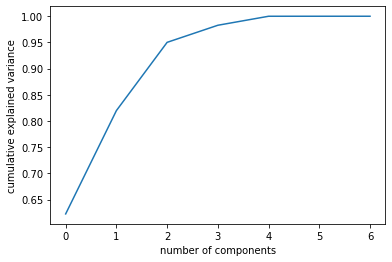

In [ ]:
pca = PCA().fit(scaled_data1.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca1=PCA(n_components = 2)

In [ ]:
pca1.fit(scaled_data1)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca1=pca1.transform(scaled_data1)

In [ ]:
print("Dimensions before applying PCA: ",scaled_data1.shape)
print("Dimensions after applying PCA: ",x_pca1.shape)

Dimensions before applying PCA:  (59, 7)
Dimensions after applying PCA:  (59, 2)


In [ ]:
scaled_data1

In [ ]:
x_pca1

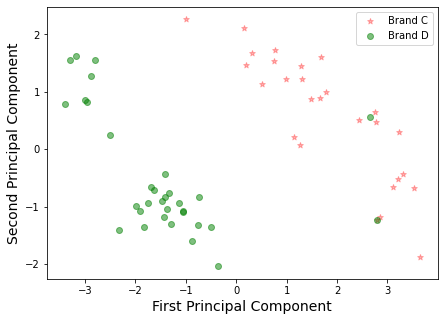

In [ ]:
Xax=x_pca1[:,0]
Yax=x_pca1[:,1]

labels= df1.brand
cdict={2:'red',3:'green'}
labl={2:'Brand C',3:'Brand D'}
marker={2:'*',3:'o'}
alpha={2:.3, 3:.5}

fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')

for l in np.unique(labels):
 ix=np.where(labels==l)
 #print(ix)
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],marker=marker[l],alpha=alpha[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

features = ["mois", "prot", "fat", "ash", "sodium","carb","cal"]
#brand', 'id', 'mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal'
pca = PCA()
components = pca.fit_transform(pizza_no_brand1[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=df1["brand"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

If we take into consideration the PCA3 and plot a graph taking that into consideration we get as follows:

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

X = pizza_no_brand1[["mois", "prot", "fat", "ash", "sodium","carb","cal"]]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df1['brand'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

X = pizza_no_brand1[["mois", "prot", "fat", "ash", "sodium","carb","cal"]]
pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df1['brand'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()